In [1]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = r'\usepackage{libertine}' 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

In [2]:
masterdata = pd.read_csv("../experiments/2019-03-29-21-09_BanditStaticGenerators_/BanditStaticGenerators.csv")
narms = masterdata.iloc[0]['k']

In [3]:
masterdata.tail(20)

,bandit,dataset,scalingstrategy,generator,k,gain,cputime,iteration
4999980,MP-TS-ADWIN-0.1,StaticGenerator1-100,KL-1-100-0.9,StaticGenerator1-100,18.75,16.73,4.8955,99980
4999981,MP-TS-ADWIN-0.1,StaticGenerator1-100,KL-1-100-0.9,StaticGenerator1-100,18.89,16.85,4.7081,99981
4999982,MP-TS-ADWIN-0.1,StaticGenerator1-100,KL-1-100-0.9,StaticGenerator1-100,18.71,16.95,4.4249,99982
4999983,MP-TS-ADWIN-0.1,StaticGenerator1-100,KL-1-100-0.9,StaticGenerator1-100,18.77,17.02,4.5050,99983
4999984,MP-TS-ADWIN-0.1,StaticGenerator1-100,KL-1-100-0.9,StaticGenerator1-100,18.69,16.99,4.4941,99984
4999985,MP-TS-ADWIN-0.1,StaticGenerator1-100,KL-1-100-0.9,StaticGenerator1-100,18.89,17.01,5.7450,99985
4999986,MP-TS-ADWIN-0.1,StaticGenerator1-100,KL-1-100-0.9,StaticGenerator1-100,18.73,16.83,4.4349,99986
4999987,MP-TS-ADWIN-0.1,StaticGenerator1-100,KL-1-100-0.9,StaticGenerator1-100,18.77,16.71,4.4980,99987
4999988,MP-TS-ADWIN-0.1,StaticGenerator1-100,KL-1-100-0.9,StaticGenerator1-100,18.65,16.71,4.7928,99988
4999989,MP-TS-ADWIN-0.1,StaticGenerator1-100,KL-1-100-0.9,StaticGenerator1-100,18.71,16.78,4.5121,99989


In [4]:
sorted(masterdata.bandit.unique())

['CUCB',
 'CUCBm',
 'Exp3.M',
 'IMP-TS',
 'MP-KLUCB',
 'MP-KLUCBPLUS',
 'MP-OTS',
 'MP-TS',
 'MP-TS-ADWIN-0.1',
 'OS']

In [5]:
masterdata['reward/arm'] = masterdata['gain']/masterdata['k']

In [6]:
masterdata["scalingstrategy"].unique()

array(['KL-1-100-0.9'], dtype=object)

In [7]:
masterdata["generator"].unique()

array(['StaticGenerator2-100', 'StaticGenerator0-100',
       'StaticGenerator4-100', 'StaticGenerator3-100',
       'StaticGenerator1-100'], dtype=object)

In [8]:
masterdata.groupby(["bandit", "generator"])[['gain', 'k', 'reward/arm']].mean()

gain          k  reward/arm
bandit          generator                                             
CUCB            StaticGenerator0-100  18.298248  20.313594    0.901209
                StaticGenerator1-100  16.471551  18.289911    0.901083
                StaticGenerator2-100  17.386384  19.303608    0.901139
                StaticGenerator3-100  17.698639  19.650706    0.901106
                StaticGenerator4-100  17.781888  19.732644    0.901580
CUCBm           StaticGenerator0-100  18.584260  20.630455    0.901238
                StaticGenerator1-100  16.779240  18.629253    0.901196
                StaticGenerator2-100  17.677896  19.625081    0.901240
                StaticGenerator3-100  17.960517  19.935253    0.901389
                StaticGenerator4-100  18.011888  19.977900    0.902036
Exp3.M          StaticGenerator0-100   1.618754   2.215994    0.605619
                StaticGenerator1-100   1.371645   1.954412    0.592879
                StaticGenerator2-100   1.471151   2.058078    0.599185
                StaticGenerator3-100   1.519541   2.110066    0.601138
                StaticGenerator4-100   1.535108   2.126121    0.602061
IMP-TS          StaticGenerator0-100  18.687856  20.749995    0.901038
                StaticGenerator1-100  16.888996  18.754912    0.901009
                StaticGenerator2-100  17.798765  19.765252    0.900963
                StaticGenerator3-100  18.048583  20.034286    0.901330
                StaticGenerator4-100  18.272907  20.294610    0.900818
MP-KLUCB        StaticGenerator0-100  18.640404  20.695497    0.901118
                StaticGenerator1-100  16.821532  18.676505    0.901179
                StaticGenerator2-100  17.737797  19.694338    0.901112
                StaticGenerator3-100  17.997879  19.976166    0.901413
                StaticGenerator4-100  18.040061  20.007606    0.902105
MP-KLUCBPLUS    StaticGenerator0-100  18.696253  20.760461    0.900988
                StaticGenerator1-100  16.894900  18.762148    0.900975
                StaticGenerator2-100  17.799159  19.765670    0.900964
                StaticGenerator3-100  18.038806  20.021855    0.901401
                StaticGenerator4-100  18.120761  20.103451    0.901819
MP-OTS          StaticGenerator0-100  18.701670  20.766718    0.900979
                StaticGenerator1-100  16.896725  18.764351    0.900968
                StaticGenerator2-100  17.801095  19.767953    0.900960
                StaticGenerator3-100  18.045039  20.029699    0.901361
                StaticGenerator4-100  18.255663  20.272588    0.900948
MP-TS           StaticGenerator0-100  18.698314  20.763391    0.900966
                StaticGenerator1-100  16.891377  18.758485    0.900969
                StaticGenerator2-100  17.788472  19.752945    0.901008
                StaticGenerator3-100  18.038758  20.022497    0.901374
                StaticGenerator4-100  18.212505  20.219264    0.901193
MP-TS-ADWIN-0.1 StaticGenerator0-100  18.556537  20.663697    0.898449
                StaticGenerator1-100  16.762796  18.673151    0.898198
                StaticGenerator2-100  17.653700  19.662422    0.898300
                StaticGenerator3-100  18.064819  20.134890    0.897634
                StaticGenerator4-100  18.159111  20.232569    0.897957
OS              StaticGenerator0-100  18.974178  21.105447    0.899414
                StaticGenerator1-100  17.178070  19.109619    0.899398
                StaticGenerator2-100  18.079803  20.112040    0.899388
                StaticGenerator3-100  18.447818  20.529359    0.899053
                StaticGenerator4-100  18.468700  20.534056    0.899870

In [32]:
masterdata.describe()

,k,gain,cputime,iteration,reward/arm
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,3.510476e+01,2.354021e+01,8.930383e-01,4.999950e+04,7.950492e-01
std,3.285547e+01,1.409751e+01,1.062256e+00,2.886752e+04,1.699586e-01
min,1.000000e+00,3.300000e-01,1.760000e-02,0.000000e+00,3.055556e-01
25%,1.998000e+01,1.795000e+01,3.347000e-01,2.499975e+04,6.000000e-01
50%,2.022000e+01,1.827000e+01,4.778000e-01,4.999950e+04,8.932331e-01
75%,2.248000e+01,1.997000e+01,6.974000e-01,7.499925e+04,9.011194e-01
max,1.000000e+02,5.192000e+01,1.402350e+01,9.999900e+04,9.316940e-01


In [9]:
masterdata['dataset'].unique()

array(['StaticGenerator2-100', 'StaticGenerator0-100',
       'StaticGenerator4-100', 'StaticGenerator3-100',
       'StaticGenerator1-100'], dtype=object)

In [10]:
husl4 = sns.color_palette("husl", 4)
husl5 = sns.color_palette("husl", 5)
husl6 = sns.color_palette("husl", 7)
greens5 = sns.color_palette("Greens_r", 5)
purples5 = sns.color_palette("Purples_r", 5)
blues5 = sns.color_palette("Blues_r", 5)
reds5 = sns.color_palette("Reds_r", 5)
oranges5 = sns.color_palette("Oranges_r", 5)
greys5 = sns.color_palette("Greys_r", 5)

In [11]:
styledictionary = {
    
    'MP-TS': {'marker': 'o', 'color': reds5[0], 'linestyle': "-"},
    'MP-TS-ADWIN-0.1': {'marker': 'o', 'color': reds5[0], 'linestyle': ":"},
    'MP-KLUCB': {'marker': '^', 'color': blues5[0], 'linestyle': "-"},
    'Exp3.M' : {'marker': 's', 'color': purples5[0], 'linestyle': "-"},
    'CUCB': {'marker': 'D', 'color': greens5[0], 'linestyle': "-"},
    'OR': {'marker': '', 'color': husl5[2], 'linestyle': "-"},
    'OS': {'marker': '', 'color': oranges5[0], 'linestyle': "-"},
    'OR': {'marker': '', 'color': "black", 'linestyle': "-"},
    'OD': {'marker': '', 'color': "red", 'linestyle': "-"},
}

In [12]:
masterdata["scalingstrategy"].unique()

array(['KL-1-100-0.9'], dtype=object)

In [13]:
delta = 0.9
scalingstrategy  = 'KL-1-100-%s'%delta
data = masterdata.loc[masterdata["scalingstrategy"] == scalingstrategy]

In [14]:
data.columns

Index(['bandit', 'dataset', 'scalingstrategy', 'generator', 'k', 'gain',
       'cputime', 'iteration', 'reward/arm'],
      dtype='object')

In [15]:
data.groupby("bandit")["reward/arm"].describe()

,count,mean,std,min,25%,50%,75%,max
bandit,,,,,,,,
CUCB,500000.0,0.901223,0.009544,0.489796,0.896891,0.901454,0.905941,0.931017
CUCBm,500000.0,0.901420,0.009470,0.489796,0.897143,0.901647,0.906072,0.931976
Exp3.M,500000.0,0.600176,0.126712,0.280374,0.516667,0.563636,0.635714,0.934175
IMP-TS,500000.0,0.901032,0.009456,0.491531,0.896755,0.901258,0.905679,0.930282
MP-KLUCB,500000.0,0.901385,0.009463,0.489796,0.897101,0.901600,0.906008,0.931795
MP-KLUCBPLUS,500000.0,0.901229,0.009460,0.489796,0.896954,0.901451,0.905906,0.929860
MP-OTS,500000.0,0.901043,0.009472,0.491735,0.896790,0.901272,0.905681,0.929878
MP-TS,500000.0,0.901102,0.009521,0.496900,0.896847,0.901352,0.905769,0.930118
MP-TS-ADWIN-0.1,500000.0,0.898108,0.009537,0.496837,0.893769,0.898322,0.902815,0.929067


In [16]:
prettynames = {
    "CUCB": "S-CUCB",
    "CUCBm": "S-CUCBm",
    "Exp3.M": "S-Exp3.M",
    "MP-KLUCB": "S-KL-UCB",
    "MP-KLUCBPLUS": "S-KL-UCB+",
    "IMP-TS": "S-ITS",
    "MP-OTS": "S-OTS",
    "MP-TS": "S-TS",
    "MP-TS-ADWIN-0.1": "S-TS-ADWIN",
    "OD": "S-DO",
    "OR": "S-RO",
    "OS": "S-SO"
}

selectedbandits =  ["CUCB", "Exp3.M", "MP-KLUCB", "MP-TS", "MP-TS-ADWIN-0.1", "OD", "OR", "OS"]

In [17]:
pullref = np.full(100000,20)

In [21]:
#expected_gains = np.linspace(0.995,0.5,9901) #expected_gains = np.linspace(0.9975,0.5025,9901)

expected_gains0 = np.linspace(1.0,0.505,9901)
expected_gains1 = np.linspace(0.99,0.495,9901)
expected_gains2 = np.linspace(0.995,0.5,9901)

expected_gains3 = np.linspace(0.9966666666666667,0.5016666666666666,9901)
expected_gains4 = np.linspace(0.9975,0.5025,9901)

In [19]:
masterdata["bandit"].unique()

array(['CUCB', 'OS', 'CUCBm', 'MP-KLUCBPLUS', 'MP-OTS', 'IMP-TS',
       'MP-KLUCB', 'MP-TS', 'Exp3.M', 'MP-TS-ADWIN-0.1'], dtype=object)

In [20]:
selected_bandits = ['CUCB', 'MP-TS', 'MP-KLUCB', 'Exp3.M']

<IPython.core.display.Javascript object>


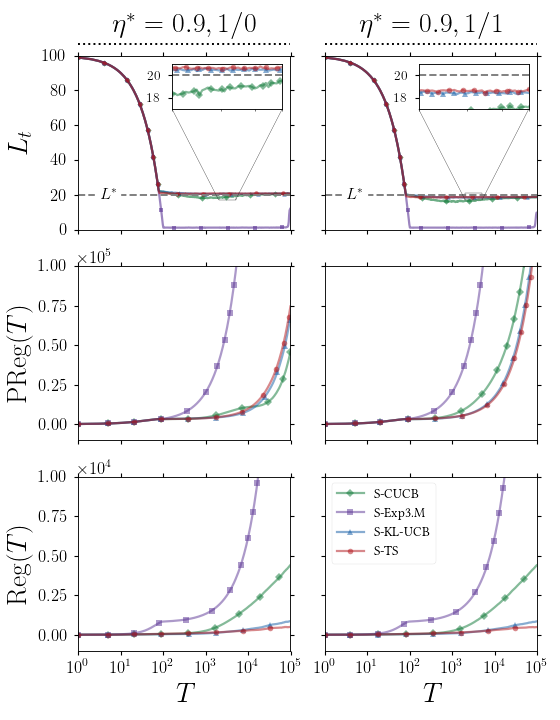

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [30]:
%matplotlib notebook

fig, axes = plt.subplots(3, 2, sharey='row', sharex=True, figsize=(7,9))
axees = axes.flatten()

generators = ['StaticGenerator0-100', 'StaticGenerator1-100']
expectedgains = [expected_gains0, expected_gains1]
targets = [20,20]
netas = [0.9,0.9]
pullrefs = [np.full(100000,20), np.full(100000,20)]

# top plots
offset = 0

for j,gen in enumerate(generators):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["generator"] == gen].groupby("bandit")
    
    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        df = df.sort_values("iteration").reset_index()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        df = df.iloc[[0] + list(indices)]
        name = df['bandit'][0]
        if(name in ["OD", "OR"]):
            pass
        else:
            lw = 2
            df['k'].plot(label=prettynames[name], linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.6, markersize=4,# logx=True,
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    plt.axhline(y=targets[j], linestyle="--", c="grey")
    plt.text(5, targets[j], "$L^*$", fontsize=15, va='center', ha='center', backgroundcolor='w')
    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel("$L_t$")
        
    plt.ylim((0,100))
    plt.title(r'$\eta^* = %s, 1/%s$'%(netas[j], gen.split("-")[0][-1]), y=1.1)
    plt.axhline(y=107, c="black", linestyle=":", clip_on=False)

    ax = plt.gca()
    from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
    axins = zoomed_inset_axes(ax, 6.5, loc=1)

    for i,df in data_grouped:
        df = df.sort_values("iteration").reset_index()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        df = df.iloc[[0] + list(indices)]
        name = df['bandit'][0]
        if(name in ["OD", "OR"]):
            pass
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                df['k'].plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                df['k'].plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    x1, x2, y1, y2 = 2000, 5000, targets[j]-3, targets[j]+1 # specify the limits
    axins.set_xlim(x1, x2) # apply the x-limits
    axins.set_ylim(y1, y2) # apply the y-limits

    axins.tick_params(axis='x',which='both',labelbottom='off')
    plt.tick_params(axis="both", labelsize=12)

    plt.axhline(y=targets[j], linestyle="--", c="grey")
    plt.yticks([targets[j],targets[j]-2], ["$%s$"%(targets[j]),"$%s$"%(targets[j]-2)])

    from mpl_toolkits.axes_grid1.inset_locator import mark_inset
    mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.1")
    
# middle plots   
offset = 2

for j,gen in enumerate(generators):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["generator"] == gen].groupby("bandit")
    
    pullref = pullrefs[j]

    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        ks = df.sort_values("iteration").reset_index().k
        regret = np.abs(pullref - ks)
        cumsum = regret.cumsum()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        cumsum = cumsum.iloc[[0] + list(indices)]
        name = df.iloc[0,0]
        if(name in ["OD", "OR"]):
            pass # do not plot it 
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel("$\mathrm{PReg}(T)$")
        
    plt.ylim((-10000,100000))

    
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
# lower plots 
offset = 4


for j,gen in enumerate(generators):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["generator"] == gen].groupby("bandit")
    
    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        ks = df.sort_values("iteration").reset_index().k
        gains = df.sort_values("iteration").reset_index().gain
        regret = [expectedgains[j][int((x-1)*100)]*x for x in ks] - gains
        cumsum = regret.cumsum()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        cumsum = cumsum.iloc[[0] + list(indices)]
        name = df.iloc[0,0]
        if(name in ["OD", "OR"]):
            pass # do not plot it 
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel(r"$\mathrm{Reg}(T)$")
    else:
        plt.legend(fontsize = 12, ncol=1, loc='best')
        
    plt.ylim((-1000,10000))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
    plt.xlabel("$T$")
    plt.xticks([1,10,100,1000,10000,100000])
    
plt.tight_layout()
plt.savefig("static_experiment_generator_0_1.pdf")




<IPython.core.display.Javascript object>


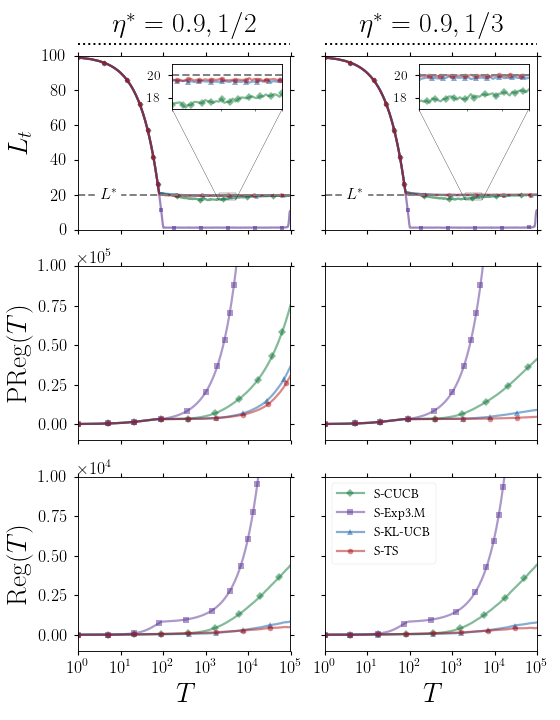

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [31]:
%matplotlib notebook

fig, axes = plt.subplots(3, 2, sharey='row', sharex=True, figsize=(7,9))
axees = axes.flatten()

generators = ['StaticGenerator2-100', 'StaticGenerator3-100']
expectedgains = [expected_gains2, expected_gains3]
targets = [20,20]
netas = [0.9,0.9]
pullrefs = [np.full(100000,20), np.full(100000,20)]

# top plots
offset = 0

for j,gen in enumerate(generators):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["generator"] == gen].groupby("bandit")
    
    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        df = df.sort_values("iteration").reset_index()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        df = df.iloc[[0] + list(indices)]
        name = df['bandit'][0]
        if(name in ["OD", "OR"]):
            pass
        else:
            lw = 2
            df['k'].plot(label=prettynames[name], linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.6, markersize=4,# logx=True,
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    plt.axhline(y=targets[j], linestyle="--", c="grey")
    plt.text(5, targets[j], "$L^*$", fontsize=15, va='center', ha='center', backgroundcolor='w')
    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel("$L_t$")
        
    plt.ylim((0,100))
    plt.title(r'$\eta^* = %s, 1/%s$'%(netas[j], gen.split("-")[0][-1]), y=1.1)
    plt.axhline(y=107, c="black", linestyle=":", clip_on=False)

    ax = plt.gca()
    from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
    axins = zoomed_inset_axes(ax, 6.5, loc=1)

    for i,df in data_grouped:
        df = df.sort_values("iteration").reset_index()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        df = df.iloc[[0] + list(indices)]
        name = df['bandit'][0]
        if(name in ["OD", "OR"]):
            pass
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                df['k'].plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                df['k'].plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    x1, x2, y1, y2 = 2000, 5000, targets[j]-3, targets[j]+1 # specify the limits
    axins.set_xlim(x1, x2) # apply the x-limits
    axins.set_ylim(y1, y2) # apply the y-limits

    axins.tick_params(axis='x',which='both',labelbottom='off')
    plt.tick_params(axis="both", labelsize=12)

    plt.axhline(y=targets[j], linestyle="--", c="grey")
    plt.yticks([targets[j],targets[j]-2], ["$%s$"%(targets[j]),"$%s$"%(targets[j]-2)])

    from mpl_toolkits.axes_grid1.inset_locator import mark_inset
    mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.1")
    
# middle plots   
offset = 2

for j,gen in enumerate(generators):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["generator"] == gen].groupby("bandit")
    
    pullref = pullrefs[j]

    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        ks = df.sort_values("iteration").reset_index().k
        regret = np.abs(pullref - ks)
        cumsum = regret.cumsum()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        cumsum = cumsum.iloc[[0] + list(indices)]
        name = df.iloc[0,0]
        if(name in ["OD", "OR"]):
            pass # do not plot it 
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel("$\mathrm{PReg}(T)$")
        
    plt.ylim((-10000,100000))

    
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
# lower plots 
offset = 4


for j,gen in enumerate(generators):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["generator"] == gen].groupby("bandit")
    
    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        ks = df.sort_values("iteration").reset_index().k
        gains = df.sort_values("iteration").reset_index().gain
        regret = [expectedgains[j][int((x-1)*100)]*x for x in ks] - gains
        cumsum = regret.cumsum()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        cumsum = cumsum.iloc[[0] + list(indices)]
        name = df.iloc[0,0]
        if(name in ["OD", "OR"]):
            pass # do not plot it 
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel(r"$\mathrm{Reg}(T)$")
    else:
        plt.legend(fontsize = 12, ncol=1, loc='best')
        
    plt.ylim((-1000,10000))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
    plt.xlabel("$T$")
    plt.xticks([1,10,100,1000,10000,100000])
    
plt.tight_layout()
plt.savefig("static_experiment_generator_2_3.pdf")




<IPython.core.display.Javascript object>


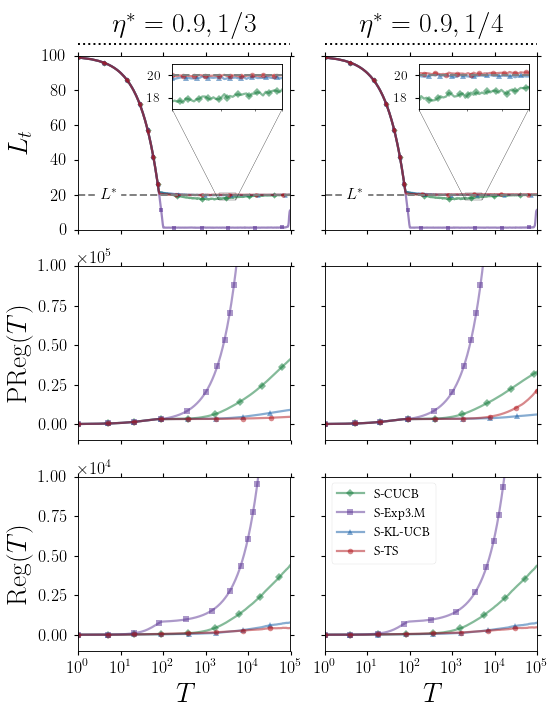

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [32]:
%matplotlib notebook

fig, axes = plt.subplots(3, 2, sharey='row', sharex=True, figsize=(7,9))
axees = axes.flatten()

generators = ['StaticGenerator3-100', 'StaticGenerator4-100']
expectedgains = [expected_gains3, expected_gains4]
targets = [20,20]
netas = [0.9,0.9]
pullrefs = [np.full(100000,20), np.full(100000,20)]

# top plots
offset = 0

for j,gen in enumerate(generators):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["generator"] == gen].groupby("bandit")
    
    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        df = df.sort_values("iteration").reset_index()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        df = df.iloc[[0] + list(indices)]
        name = df['bandit'][0]
        if(name in ["OD", "OR"]):
            pass
        else:
            lw = 2
            df['k'].plot(label=prettynames[name], linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.6, markersize=4,# logx=True,
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    plt.axhline(y=targets[j], linestyle="--", c="grey")
    plt.text(5, targets[j], "$L^*$", fontsize=15, va='center', ha='center', backgroundcolor='w')
    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel("$L_t$")
        
    plt.ylim((0,100))
    plt.title(r'$\eta^* = %s, 1/%s$'%(netas[j], gen.split("-")[0][-1]), y=1.1)
    plt.axhline(y=107, c="black", linestyle=":", clip_on=False)

    ax = plt.gca()
    from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
    axins = zoomed_inset_axes(ax, 6.5, loc=1)

    for i,df in data_grouped:
        df = df.sort_values("iteration").reset_index()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        df = df.iloc[[0] + list(indices)]
        name = df['bandit'][0]
        if(name in ["OD", "OR"]):
            pass
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                df['k'].plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                df['k'].plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    x1, x2, y1, y2 = 2000, 5000, targets[j]-3, targets[j]+1 # specify the limits
    axins.set_xlim(x1, x2) # apply the x-limits
    axins.set_ylim(y1, y2) # apply the y-limits

    axins.tick_params(axis='x',which='both',labelbottom='off')
    plt.tick_params(axis="both", labelsize=12)

    plt.axhline(y=targets[j], linestyle="--", c="grey")
    plt.yticks([targets[j],targets[j]-2], ["$%s$"%(targets[j]),"$%s$"%(targets[j]-2)])

    from mpl_toolkits.axes_grid1.inset_locator import mark_inset
    mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.1")
    
# middle plots   
offset = 2

for j,gen in enumerate(generators):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["generator"] == gen].groupby("bandit")
    
    pullref = pullrefs[j]

    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        ks = df.sort_values("iteration").reset_index().k
        regret = np.abs(pullref - ks)
        cumsum = regret.cumsum()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        cumsum = cumsum.iloc[[0] + list(indices)]
        name = df.iloc[0,0]
        if(name in ["OD", "OR"]):
            pass # do not plot it 
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel("$\mathrm{PReg}(T)$")
        
    plt.ylim((-10000,100000))

    
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
# lower plots 
offset = 4


for j,gen in enumerate(generators):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["generator"] == gen].groupby("bandit")
    
    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        ks = df.sort_values("iteration").reset_index().k
        gains = df.sort_values("iteration").reset_index().gain
        regret = [expectedgains[j][int((x-1)*100)]*x for x in ks] - gains
        cumsum = regret.cumsum()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        cumsum = cumsum.iloc[[0] + list(indices)]
        name = df.iloc[0,0]
        if(name in ["OD", "OR"]):
            pass # do not plot it 
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel(r"$\mathrm{Reg}(T)$")
    else:
        plt.legend(fontsize = 12, ncol=1, loc='best')
        
    plt.ylim((-1000,10000))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
    plt.xlabel("$T$")
    plt.xticks([1,10,100,1000,10000,100000])
    
plt.tight_layout()
plt.savefig("static_experiment_generator_3_4.pdf")


